In [39]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [14]:
# Reading data
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EXPLORING THE DATA

In [15]:
df.shape

(25, 2)

In [17]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

No null values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


STD means that the study hours of students are, on average, 5.012 hours. The standard deviation of 2.525094 indicates that the study hours vary by about 2.525094 hours from the average. So, most of the students' study hours are within the range of (5.012 - 2.525094) to (5.012 + 2.525094), which is approximately 2.487 to 7.537 hours.

25%ile means that 25% of the students study for less than or equal to 2.7 hours, and 25% of the students score less than or equal to 30.Similarly for other %percentile

In [20]:
# Calculating percentiles
percentiles = [25, 50, 75]

Q1 = np.percentile(df['Hours'], percentiles[0])
Q2 = np.percentile(df['Hours'], percentiles[1])
Q3 = np.percentile(df['Hours'], percentiles[2])

print(f"25th percentile for Hours: {Q1}")
print(f"50th percentile (Median) for Hours: {Q2}")
print(f"75th percentile for Hours: {Q3}")

25th percentile for Hours: 2.7
50th percentile (Median) for Hours: 4.8
75th percentile for Hours: 7.4


In [27]:
IQR = Q3-Q1
print(f"Interquartile Range (IQR) is: {IQR}")

Interquartile Range (IQR) is: 4.7


In [28]:
#to check outlier, we can use IQR

In [30]:
uc = Q3 + 1.5 * (IQR)
lc = Q1 - 1.5 * (IQR)
print(f"Upper Limit is: {uc}")
print(f"Lower Limiyt is: {lc}")

Upper Limit is: 14.450000000000001
Lower Limiyt is: -4.3500000000000005


In [33]:
def identify_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column<lower_bound) | (column > upper_bound)]
    return outliers

In [34]:
df.apply(identify_outliers)

,Hours,Scores


So, There are no outliers in this dataset

Text(0.5, 1.0, 'Box Plot of Hours')

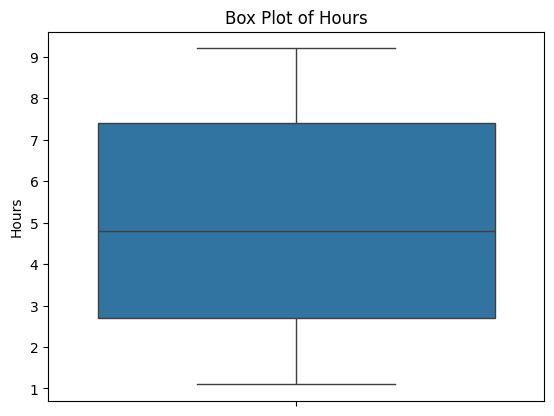

In [44]:
sns.boxplot(y=df['Hours'])
plt.title('Box Plot of Hours')

Text(0.5, 1.0, 'Box Plot of Scores')

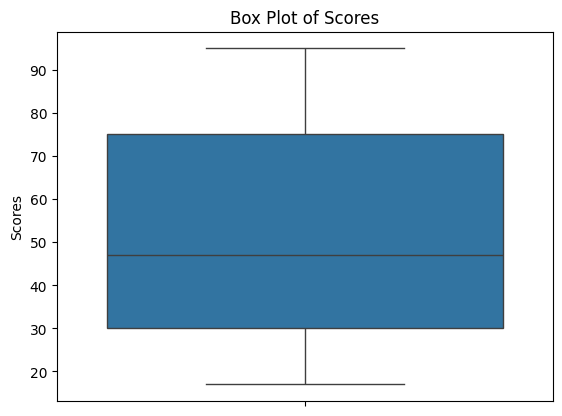

In [45]:
sns.boxplot(y=df['Scores'])
plt.title('Box Plot of Scores')

Text(0, 0.5, 'Frequency')

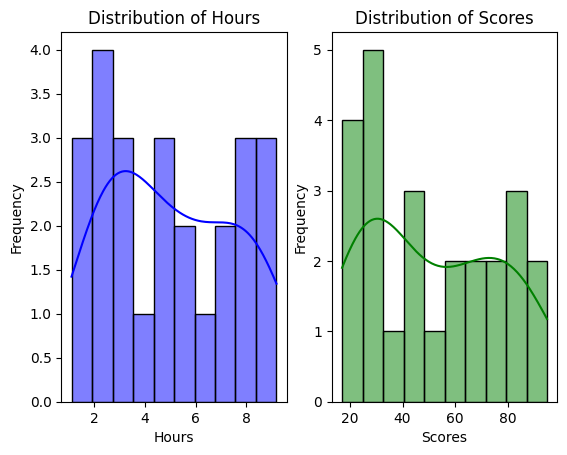

In [46]:
# Distribution plot for Hours
plt.subplot(1, 2, 1)
sns.histplot(df['Hours'], kde=True, bins=10, color='blue')
plt.title('Distribution of Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Distribution plot for Scores
plt.subplot(1, 2, 2)
sns.histplot(df['Scores'], kde=True, bins=10, color='green')
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

The Score distribution shows a slight right skewness with a longer tail extending towards the higher end of the number of hours studied. This suggests a few students are studying significantly more hours than the rest.

The Score distribution appears to be slightly left-skewed, with the KDE showing a peak around the lower scores and a few students achieving much higher scores.

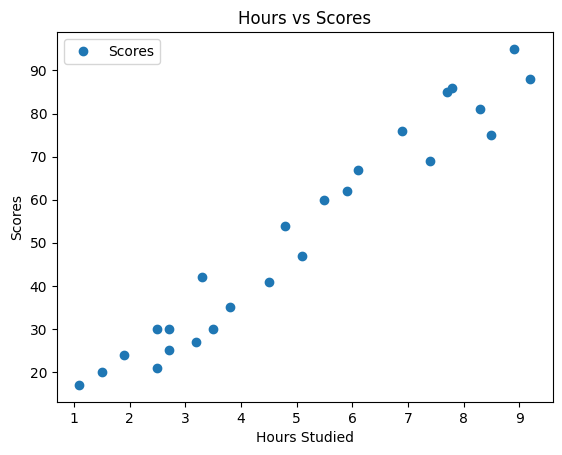

In [49]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.show()

There is a positive linear relation between the number of hours studied and percentage of score.

In [55]:
inputs= s_data.iloc[:, :-1].values  
labels = s_data.iloc[:, 1].values  

Split this data into training and test sets

In [56]:
from sklearn .model_selection import train_test_split

In [59]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs , labels , test_size=0.2 , random_state=1)

### Training the Algorithm

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model  = LinearRegression()  

Fitting the data into model

In [64]:
model.fit(inputs_train,labels_train)

LinearRegression()

In [76]:
# coefficient
m = model.coef_

In [77]:
#intercept
c = model.intercept_

Linear Equation

In [78]:
Equation = m * ( inputs)+ c

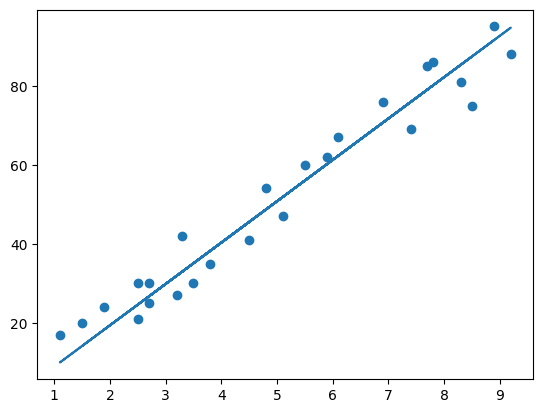

In [82]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, Equation);
plt.show()

Now that we have trained our algorithm, We are now going to predict

In [89]:
# Testing data - In Hours
print(inputs_test)
# Predicting the scores
labels_pred = model.predict(inputs_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [90]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': labels_test, 'Predicted': labels_pred})  
df 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


Evaluating the Model

This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [92]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(labels_test, labels_pred)) 

Mean Absolute Error: 7.882398086270432


The MAE is approximately 7.88, which means, on average, the predicted scores are off by about 7.88 units from the actual scores.

In [93]:
mse = metrics.mean_squared_error(labels_test, labels_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 68.88092074277635


In [94]:
rmse = np.sqrt(metrics.mean_squared_error(labels_test, labels_pred))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 8.299453038771674


In [95]:
r2 = metrics.r2_score(labels_test, labels_pred)
print('R-squared:', r2)

R-squared: 0.8421031525243527


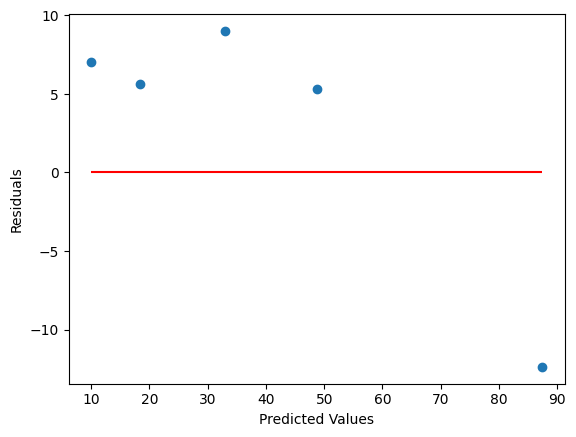

In [96]:
residuals = labels_test - labels_pred
plt.scatter(labels_pred, residuals)
plt.hlines(y=0, xmin=min(labels_pred), xmax=max(labels_pred), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Accuracy: The model seems to be reasonably accurate, but there is room for improvement, as indicated by the MAE of 7.88. Depending on the context, this might be a small or large error.

Prediction Quality: The predicted values are relatively close to the actual values, but some predictions (e.g., 17 predicted as 9.97) show a significant difference, which might indicate areas where the model could be improved.

Further Action:To check for overfitting or underfitting, and consider tuning the model parameters or exploring more complex models if necessary.